In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
class EnergyPricePreprocessing:
    def __init__(self, df):
        self.df = df

    def preprocess_df(self):
        # Handling missing values
        self.df.fillna(self.df.mean(), inplace=True)

        numeric_features = self.df.select_dtypes(include=['int64', 'float64']).columns.tolist()
        categorical_features = self.df.select_dtypes(include=['object']).columns.tolist()

        # Removing target feature & non-relevant columns
        numeric_features.remove('price actual')  
        
        # Setting up pipelines
        numeric_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ])

        categorical_transformer = Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ])
        
        self.preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_features),
                ('cat', categorical_transformer, categorical_features)
            ])

        features = self.df.drop('price actual', axis=1)
        self.df_processed = self.preprocessor.fit_transform(features)
        self.target = self.df['price actual']
        return self.df_processed, self.target

    def split_data(self, test_size=0.2, random_state=42):
        return train_test_split(self.df_processed, self.target, test_size=test_size, random_state=random_state)


In [18]:
# Load Data
data = pd.read_csv('/Users/annaywj/Desktop/github/weather_energy.csv')
data.head()

,Unnamed: 0,time,generation biomass,generation solar,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,...,drizzle,dust,fog,haze,mist,rain,smoke,snow,squall,thunderstorm
0,0,2015-01-01 00:00:00+00:00,10205.0,27448.0,95856.0,1049.500000,3942.416667,24753.250000,23966.958333,45.031667,...,0,0,0,0,0,0,0,0,0,0
1,1,2015-01-02 00:00:00+00:00,9357.0,30061.0,265441.0,1187.208333,11117.041667,27519.416667,27188.541667,17.598333,...,0,0,0,0,0,0,0,0,0,0
2,2,2015-01-03 00:00:00+00:00,10485.0,27501.0,219294.0,1133.375000,9113.416667,25500.833333,25097.750000,25.342083,...,0,0,0,0,0,0,0,0,0,0
3,3,2015-01-04 00:00:00+00:00,9513.0,57659.0,192387.0,2292.041667,8022.833333,27167.875000,27104.916667,30.658333,...,0,0,0,0,0,0,0,0,0,0
4,4,2015-01-05 00:00:00+00:00,6295.0,18396.0,121272.0,1742.916667,7608.500000,22360.333333,22484.000000,39.207500,...,0,0,0,0,0,0,0,0,0,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       1461 non-null   int64  
 1   time                             1461 non-null   object 
 2   generation biomass               1461 non-null   float64
 3   generation solar                 1461 non-null   float64
 4   generation wind onshore          1461 non-null   float64
 5   forecast solar day ahead         1461 non-null   float64
 6   forecast wind onshore day ahead  1461 non-null   float64
 7   total load forecast              1461 non-null   float64
 8   total load actual                1461 non-null   float64
 9   price day ahead                  1461 non-null   float64
 10  price actual                     1461 non-null   float64
 11  temp                             1461 non-null   float64
 12  temp_min            

### EDA

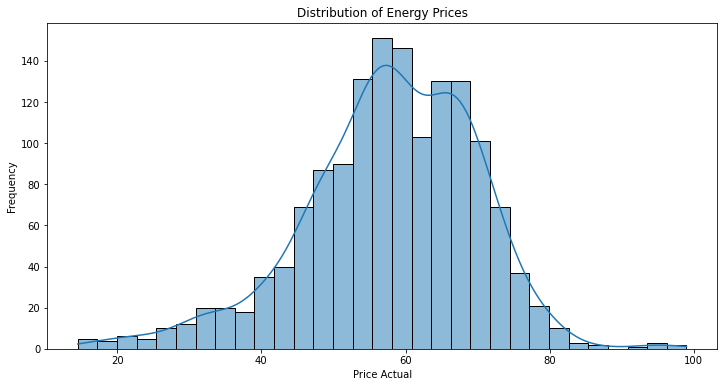

In [20]:
# Distribution of Energy Prices
plt.figure(figsize=(12, 6))
sns.histplot(data['price actual'], kde=True)
plt.title('Distribution of Energy Prices')
plt.xlabel('Price Actual')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Preprocess data
energy_processor = EnergyPricePreprocessing(data)
X_processed, y = energy_processor.preprocess_df()

In [22]:
# Split Data
X_train, X_test, y_train, y_test = energy_processor.split_data()

#### Model Training

In [23]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: " + str(mse))
print("RMSE: " + str(rmse))
print("R-squared Score: " + str(r2))

Mean Squared Error: 27.27420334143307
RMSE: 5.222470999577984
R-squared Score: 0.8137102398709577
